<a href="https://colab.research.google.com/github/durgesh510/mtaie19/blob/master/MTP_Urabn_Crime_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd 
import numpy as np
import sklearn.metrics as metrics
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from  sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import validation_curve
from sklearn.preprocessing import binarize
import matplotlib.pyplot as plot
from sklearn import linear_model
from IPython.display import Image 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn import tree
import sklearn.preprocessing as prep
import pydotplus 
import math
from sklearn.linear_model import RidgeCV
import sklearn.linear_model as linear_model
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
import os
os.chdir('/content/gdrive/MyDrive/MTP2021/')

In [5]:
!ls

Crimes_-_2001_to_Present.csv


In [6]:
crime_df=pd.read_csv('Crimes_-_2001_to_Present.csv', low_memory=False)

In [7]:
crime_df.shape

(7445894, 22)

In [8]:
crime_df = pd.read_csv('Crimes_-_2001_to_Present.csv',index_col='Date')
crime_df.head(5)

,ID,Case Number,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
Date,,,,,,,,,,,,,,,,,,,,,
09/05/2015 01:30:00 PM,10224738,HY411648,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,924,...,12.0,61.0,08B,1165074.0,1875917.0,2015,02/10/2018 03:50:01 PM,41.815117,-87.670000,"(41.815117282, -87.669999562)"
09/04/2015 11:30:00 AM,10224739,HY411615,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,1511,...,29.0,25.0,06,1138875.0,1904869.0,2015,02/10/2018 03:50:01 PM,41.895080,-87.765400,"(41.895080471, -87.765400451)"
09/01/2018 12:01:00 AM,11646166,JC213529,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,631,...,8.0,44.0,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
09/05/2015 12:45:00 PM,10224740,HY411595,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,1412,...,35.0,21.0,18,1152037.0,1920384.0,2015,02/10/2018 03:50:01 PM,41.937406,-87.716650,"(41.937405765, -87.716649687)"
09/05/2015 01:00:00 PM,10224741,HY411610,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,1522,...,28.0,25.0,08A,1141706.0,1900086.0,2015,02/10/2018 03:50:01 PM,41.881903,-87.755121,"(41.881903443, -87.755121152)"


In [9]:
crime_df.head()

,ID,Case Number,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
Date,,,,,,,,,,,,,,,,,,,,,
09/05/2015 01:30:00 PM,10224738,HY411648,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,924,...,12.0,61.0,08B,1165074.0,1875917.0,2015,02/10/2018 03:50:01 PM,41.815117,-87.670000,"(41.815117282, -87.669999562)"
09/04/2015 11:30:00 AM,10224739,HY411615,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,1511,...,29.0,25.0,06,1138875.0,1904869.0,2015,02/10/2018 03:50:01 PM,41.895080,-87.765400,"(41.895080471, -87.765400451)"
09/01/2018 12:01:00 AM,11646166,JC213529,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,631,...,8.0,44.0,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
09/05/2015 12:45:00 PM,10224740,HY411595,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,1412,...,35.0,21.0,18,1152037.0,1920384.0,2015,02/10/2018 03:50:01 PM,41.937406,-87.716650,"(41.937405765, -87.716649687)"
09/05/2015 01:00:00 PM,10224741,HY411610,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,1522,...,28.0,25.0,08A,1141706.0,1900086.0,2015,02/10/2018 03:50:01 PM,41.881903,-87.755121,"(41.881903443, -87.755121152)"


In [10]:
crime_df.Date = pd.to_datetime(crime_df.Date,format='%m/%d/%Y %I:%M:%S %p')

AttributeError: ignored

In [11]:
crime_df.head()

,ID,Case Number,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
Date,,,,,,,,,,,,,,,,,,,,,
09/05/2015 01:30:00 PM,10224738,HY411648,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,924,...,12.0,61.0,08B,1165074.0,1875917.0,2015,02/10/2018 03:50:01 PM,41.815117,-87.670000,"(41.815117282, -87.669999562)"
09/04/2015 11:30:00 AM,10224739,HY411615,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,1511,...,29.0,25.0,06,1138875.0,1904869.0,2015,02/10/2018 03:50:01 PM,41.895080,-87.765400,"(41.895080471, -87.765400451)"
09/01/2018 12:01:00 AM,11646166,JC213529,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,631,...,8.0,44.0,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
09/05/2015 12:45:00 PM,10224740,HY411595,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,1412,...,35.0,21.0,18,1152037.0,1920384.0,2015,02/10/2018 03:50:01 PM,41.937406,-87.716650,"(41.937405765, -87.716649687)"
09/05/2015 01:00:00 PM,10224741,HY411610,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,1522,...,28.0,25.0,08A,1141706.0,1900086.0,2015,02/10/2018 03:50:01 PM,41.881903,-87.755121,"(41.881903443, -87.755121152)"


In [12]:
# more than 70 lakh records are there. I will scope the data only from 2011
crime_df = crime_df[crime_df['Year'] >= 2010]

In [13]:
crime_df.shape

(3369018, 21)

**Visualizing Criminal Activity**


Year
2011    351925
2012    336208
2013    307391
2014    275658
2015    264609
2016    269643
2017    268876
2018    268495
2019    260862
2020    211430
2021    183476
dtype: int64


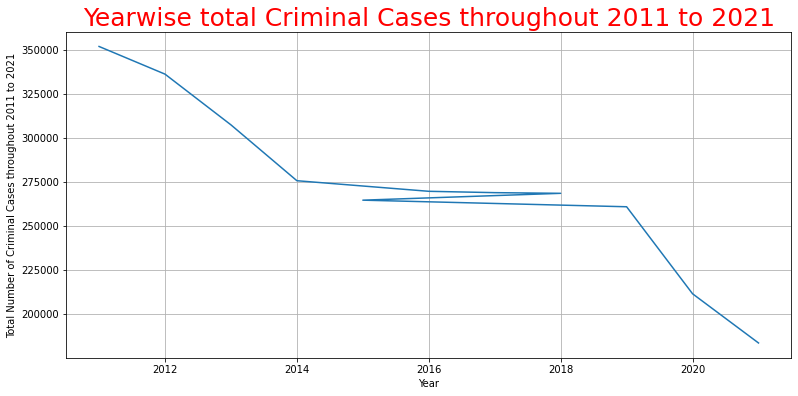

In [14]:
# Creating a Countplot to view yearwise criminal activity
crime_df = crime_df[crime_df['Year'] > 2010]
yearwise_total_crime = crime_df.groupby('Year').size()
print(yearwise_total_crime)

plt.figure(figsize=(13,6))
ct = yearwise_total_crime.sort_values(ascending=True)
ax = ct.plot.line()
ax.set_xlabel('Year')
ax.set_ylabel('Total Number of Criminal Cases throughout 2011 to 2021')
ax.set_title('Yearwise total Criminal Cases throughout 2011 to 2021',color = 'red',fontsize=25)
ax.grid(linestyle='-')
plt.show()

In [15]:
primaryVisualizeDF = crime_df.groupby('Primary Type').size()

In [16]:
'''
primaryVisualizeDF.plot.bar(figsize = (18,18))
plt.xlabel('Primary Crime Type', fontsize=4, color = 'red')
plt.legend()
'''

"\nprimaryVisualizeDF.plot.bar(figsize = (18,18))\nplt.xlabel('Primary Crime Type', fontsize=4, color = 'red')\nplt.legend()\n"

Location
Let's see the distribution of crime

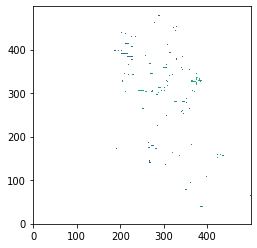

In [17]:
crime_df_loc = crime_df[crime_df['X Coordinate'] > 0]
histo, xedges, yedges = np.histogram2d(np.array(crime_df_loc['X Coordinate']), np.array(crime_df_loc['Y Coordinate']), bins=(500,500))
plt.imshow(histo.T, origin='slow', norm = LogNorm())

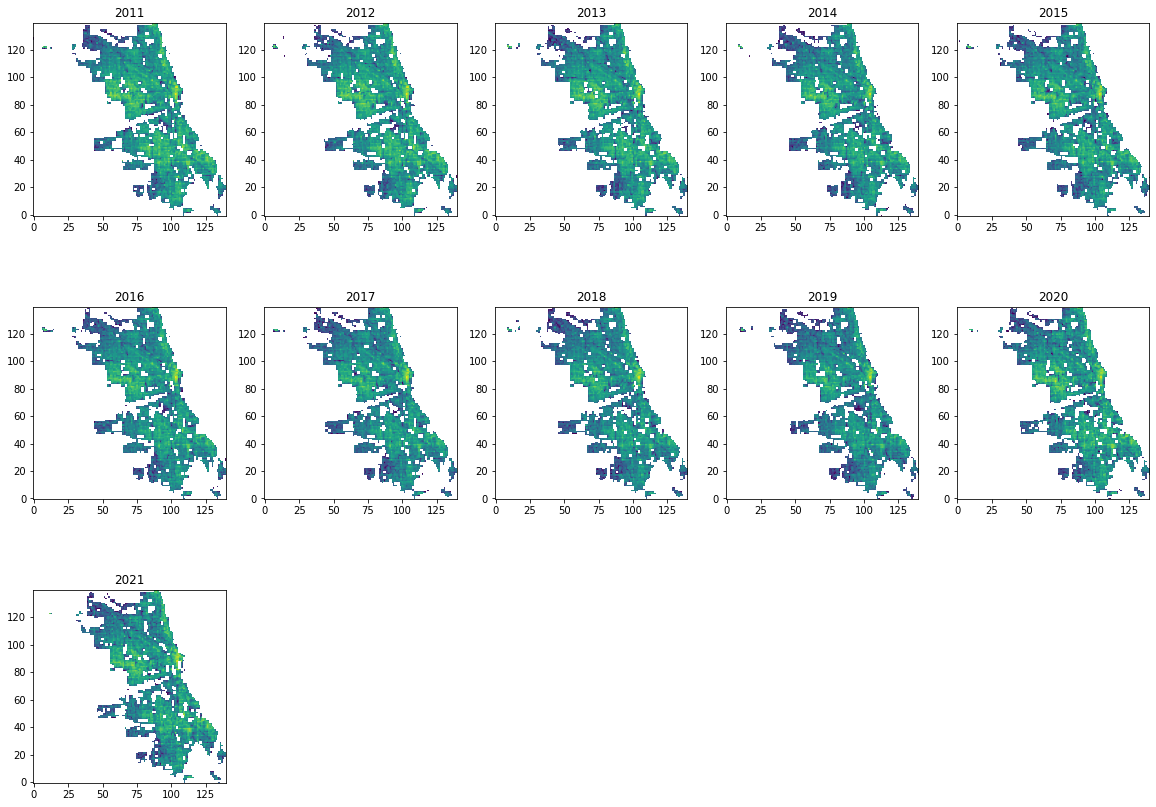

In [18]:
groups = crime_df_loc.groupby('Year')
plt.figure(figsize = (20, 20))
ii = 1
for name, grp in groups:
    plt.subplot(4,5,ii)
    histo, xedges, yedges = np.histogram2d(np.array(grp['X Coordinate']), np.array(grp['Y Coordinate']), bins=(140,140))
    plt.imshow(histo.T, origin='low', norm = LogNorm())
    plt.title(name)
    ii+=1

In [19]:
primtyp = crime_df[['Primary Type']]
crime_counts11_21 = pd.DataFrame(primtyp.groupby('Primary Type').size().sort_values(ascending=False).rename('counts').reset_index()).head(10)
crime_counts11_21

,Primary Type,counts
0,THEFT,671465
1,BATTERY,548776
2,CRIMINAL DAMAGE,322522
3,NARCOTICS,226178
4,ASSAULT,207903
5,OTHER OFFENSE,183822
6,DECEPTIVE PRACTICE,182284
7,BURGLARY,158297
8,MOTOR VEHICLE THEFT,129219
9,ROBBERY,114966


In [20]:
loc11_21 = crime_df[['Location Description']]
locations = pd.DataFrame(loc11_21.groupby('Location Description').size().sort_values(ascending=False).rename('counts').reset_index()).head(10)
locations

,Location Description,counts
0,STREET,684868
1,RESIDENCE,494626
2,APARTMENT,405853
3,SIDEWALK,288408
4,OTHER,101779
5,PARKING LOT/GARAGE(NON.RESID.),76265
6,SMALL RETAIL STORE,65537
7,ALLEY,63636
8,RESTAURANT,58610
9,RESIDENTIAL YARD (FRONT/BACK),53164


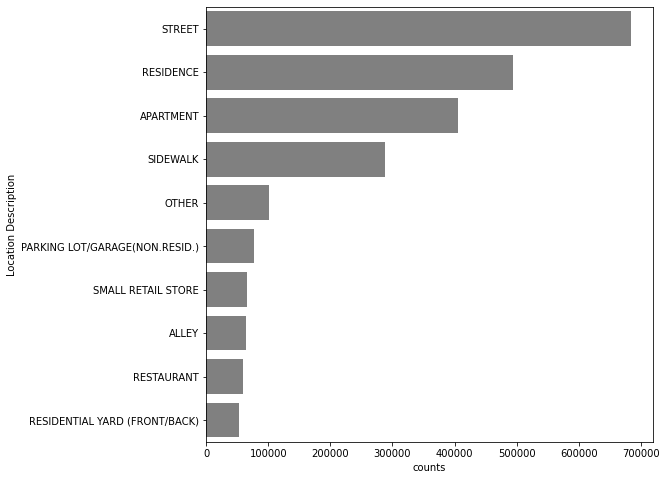

In [21]:
import seaborn as sns
plt.figure(figsize=(8,8))
#f, ax = plt.subplots(2,2)

sns.barplot(x="counts", y="Location Description", data=locations,
            label="Total", color="grey")

**Primary Type**


Now let's see the different types of crime committed.

In [22]:
crime_df['Primary Type'][crime_df['Primary Type'] == 'NON - CRIMINAL'] = 'NON-CRIMINAL'
crime_df['Primary Type'][crime_df['Primary Type'] == 'NON-CRIMINAL (SUBJECT SPECIFIED)'] = 'NON-CRIMINAL'
crime_df['Primary Type'].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


THEFT                                671465
BATTERY                              548776
CRIMINAL DAMAGE                      322522
NARCOTICS                            226178
ASSAULT                              207903
OTHER OFFENSE                        183822
DECEPTIVE PRACTICE                   182284
BURGLARY                             158297
MOTOR VEHICLE THEFT                  129219
ROBBERY                              114966
CRIMINAL TRESPASS                     73026
WEAPONS VIOLATION                     54044
OFFENSE INVOLVING CHILDREN            25056
PUBLIC PEACE VIOLATION                22370
PROSTITUTION                          12511
CRIM SEXUAL ASSAULT                   12324
INTERFERENCE WITH PUBLIC OFFICER      12072
SEX OFFENSE                           11733
HOMICIDE                               6407
ARSON                                  4948
CRIMINAL SEXUAL ASSAULT                3852
LIQUOR LAW VIOLATION                   3564
GAMBLING                        

Graphical representation


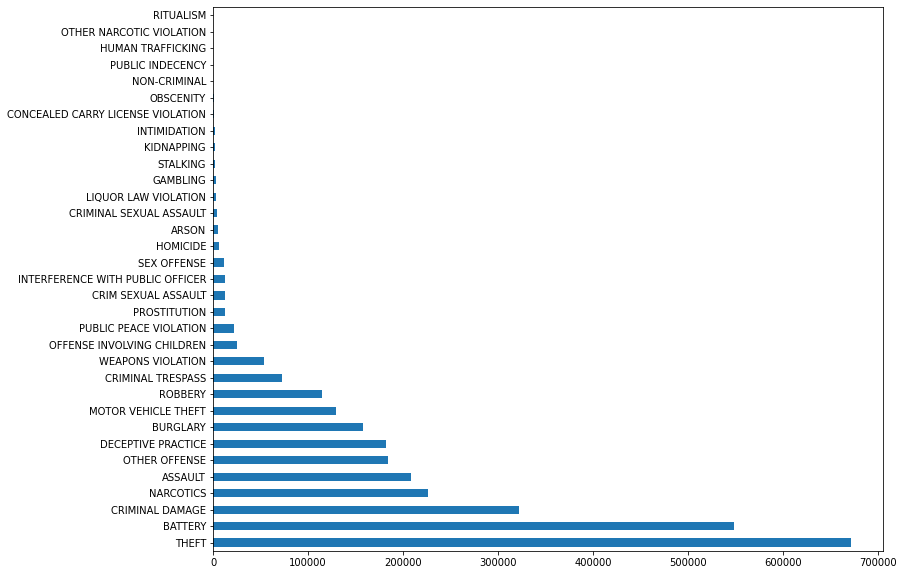

In [23]:
crime_df['Primary Type'].value_counts().plot(kind = 'barh', figsize = (12,10))

Next, a graphical representation of top 5 crimes with the descriptions to get a better idea of what those are

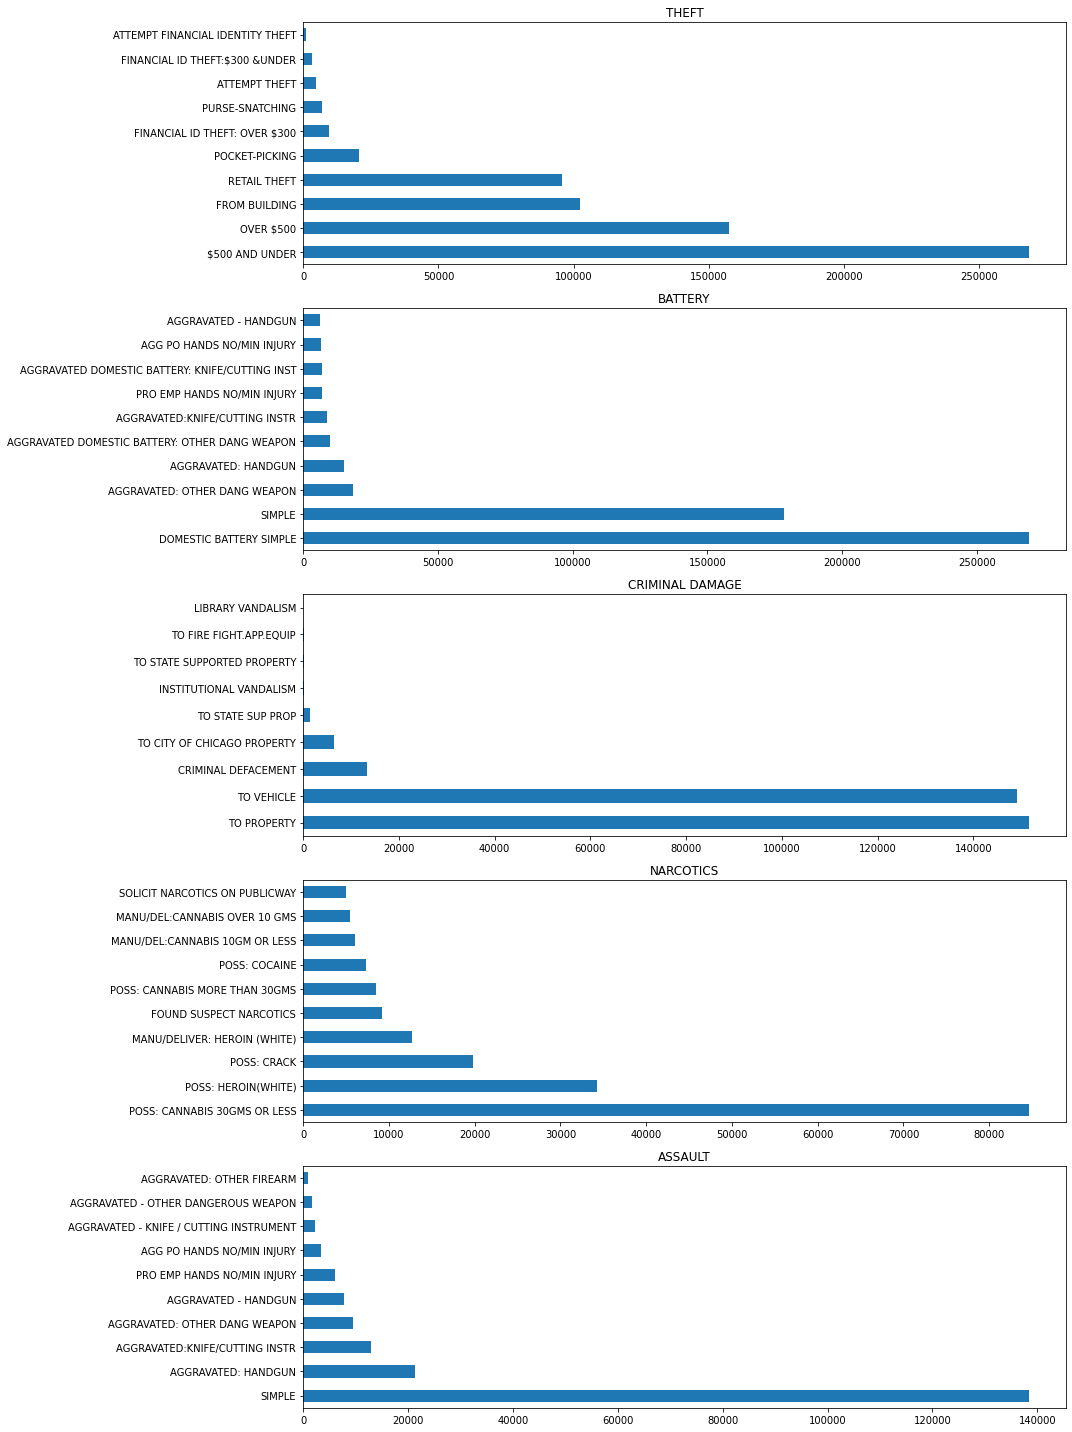

In [24]:
groups = [crime_df[crime_df['Primary Type'] == x] for x in crime_df['Primary Type'].value_counts()[:5].index]
plt.figure(figsize = (15, 20))

ii = 1
for name, grp in zip(crime_df['Primary Type'].value_counts()[:5].index,groups):
    plt.subplot(5,1,ii)
    grp['Description'].value_counts()[:10].plot(kind = 'barh')
    plt.title(name)
    ii+=1
plt.tight_layout()

**Arrest**

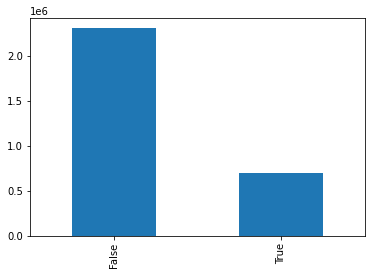

In [25]:
crime_df['Arrest'].value_counts().plot(kind = 'bar')

**Time**

In [26]:
def datetimeconv(x):
    dt, tm, m = x.split()
    hr = int(tm.split(':')[0])
    hr = hr+12 if m == 'PM' and hr is not 12 else hr
    hr = 0 if hr is 12 and m == 'AM' else hr
    return hr

In [27]:
crime_df_time = crime_df['Date']

KeyError: ignored

Dropping crimes which are minimal in nature

In [28]:
crime_df=crime_df.dropna()

In [29]:
crime_df.columns

Index(['ID', 'Case Number', 'Block', 'IUCR', 'Primary Type', 'Description',
       'Location Description', 'Arrest', 'Domestic', 'Beat', 'District',
       'Ward', 'Community Area', 'FBI Code', 'X Coordinate', 'Y Coordinate',
       'Year', 'Updated On', 'Latitude', 'Longitude', 'Location'],
      dtype='object')

In [30]:
labelEncoder = LabelEncoder()

In [31]:
# create an instance of label encoder for categorical variables
primaryEncoded = labelEncoder.fit_transform(crime_df['Primary Type'])

In [32]:
primaryEncoded

array([ 2, 31, 18, ..., 17,  2, 23])

In [33]:
crime_df['Primary Type'] = primaryEncoded

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [34]:
# create an instance of label encoder for categorical variables
labelEncoder2 = LabelEncoder()

In [35]:
locDiscEncoded = labelEncoder2.fit_transform(crime_df['Location Description'])
locDiscEncoded

array([143,  62, 165, ..., 143, 131, 143])

In [36]:
crime_df['Location Description'] = locDiscEncoded

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [37]:
# create an instance of label encoder for categorical variables
labelEncoder3 = LabelEncoder()

In [38]:
blockEncoded = labelEncoder2.fit_transform(crime_df['Location Description'])
blockEncoded

array([143,  62, 165, ..., 143, 131, 143])

In [39]:
crime_df['Block'] = locDiscEncoded

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [40]:
#using PCA to combine all features

In [41]:
location = crime_df[['Latitude','Longitude']]
pca = PCA(n_components=1,random_state=123)

In [42]:
loc = pca.fit_transform(location)

In [43]:
crime_df['Location'] = loc

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [44]:
crime_df.head(5)

,ID,Case Number,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
Date,,,,,,,,,,,,,,,,,,,,,
09/05/2015 01:30:00 PM,10224738,HY411648,143,0486,2,DOMESTIC BATTERY SIMPLE,143,False,True,924,...,12.0,61.0,08B,1165074.0,1875917.0,2015,02/10/2018 03:50:01 PM,41.815117,-87.670000,0.024953
09/04/2015 11:30:00 AM,10224739,HY411615,62,0870,31,POCKET-PICKING,62,False,False,1511,...,29.0,25.0,06,1138875.0,1904869.0,2015,02/10/2018 03:50:01 PM,41.895080,-87.765400,-0.087461
09/05/2015 12:45:00 PM,10224740,HY411595,165,2023,18,POSS: HEROIN(BRN/TAN),165,True,False,1412,...,35.0,21.0,18,1152037.0,1920384.0,2015,02/10/2018 03:50:01 PM,41.937406,-87.716650,-0.105657
09/05/2015 01:00:00 PM,10224741,HY411610,17,0560,1,SIMPLE,17,False,True,1522,...,28.0,25.0,08A,1141706.0,1900086.0,2015,02/10/2018 03:50:01 PM,41.881903,-87.755121,-0.071201
09/05/2015 10:55:00 AM,10224742,HY411435,143,0610,3,FORCIBLE ENTRY,143,False,False,614,...,21.0,71.0,05,1168430.0,1850165.0,2015,02/10/2018 03:50:01 PM,41.744379,-87.658431,0.094089


In [45]:
#crime_df = crime_df.drop('Case Number', axis=1)
crime_df = crime_df.drop('FBI Code', axis=1)
crime_df = crime_df.drop('Domestic', axis=1)
crime_df = crime_df.drop('IUCR', axis=1)
crime_df = crime_df.drop('Updated On', axis=1)
crime_df = crime_df.drop('ID', axis=1)

In [46]:
crime_df = crime_df.drop('Description', axis=1)

In [47]:
crime_df = crime_df.drop('Case Number', axis=1)

In [48]:
crime_df.head(5)

,Block,Primary Type,Location Description,Arrest,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location
Date,,,,,,,,,,,,,,
09/05/2015 01:30:00 PM,143,2,143,False,924,9.0,12.0,61.0,1165074.0,1875917.0,2015,41.815117,-87.670000,0.024953
09/04/2015 11:30:00 AM,62,31,62,False,1511,15.0,29.0,25.0,1138875.0,1904869.0,2015,41.895080,-87.765400,-0.087461
09/05/2015 12:45:00 PM,165,18,165,True,1412,14.0,35.0,21.0,1152037.0,1920384.0,2015,41.937406,-87.716650,-0.105657
09/05/2015 01:00:00 PM,17,1,17,False,1522,15.0,28.0,25.0,1141706.0,1900086.0,2015,41.881903,-87.755121,-0.071201
09/05/2015 10:55:00 AM,143,3,143,False,614,6.0,21.0,71.0,1168430.0,1850165.0,2015,41.744379,-87.658431,0.094089


In [49]:
#taking a fraction of data
crime_sample = crime_df.sample(frac=0.1, random_state=123)

Checking importance of features using an ExtraTreesClassifier

In [50]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()

In [51]:
X = crime_sample.loc[:, crime_df.columns != 'Primary Type']

In [52]:
model.fit(X,crime_sample['Primary Type'])

ExtraTreesClassifier()

In [53]:
print(model.feature_importances_)

[0.06189035 0.062      0.036843   0.04250401 0.00834203 0.02458149
 0.01943891 0.12595904 0.12584964 0.11713205 0.12476937 0.1227157
 0.12797443]


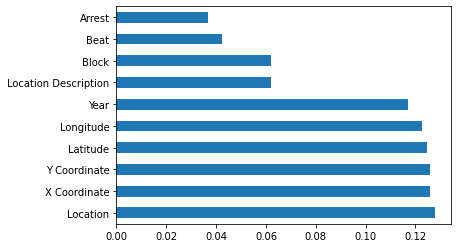

In [54]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
#plot for top 10 features
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

Find corelation between data to find dependency between data columns

In [55]:
corelation = crime_df.corr()
corelation

,Block,Primary Type,Location Description,Arrest,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location
Block,1.000000,0.123506,1.000000,0.043941,0.013290,0.013613,-0.011154,0.014839,-0.014971,-0.040453,-0.048723,-0.040268,-0.015685,0.030084
Primary Type,0.123506,1.000000,0.123506,0.030487,0.033397,0.032195,0.063056,-0.076664,0.002816,0.077471,-0.018476,0.077254,0.004089,-0.064760
Location Description,1.000000,0.123506,1.000000,0.043941,0.013290,0.013613,-0.011154,0.014839,-0.014971,-0.040453,-0.048723,-0.040268,-0.015685,0.030084
Arrest,0.043941,0.030487,0.043941,1.000000,-0.024459,-0.024082,-0.014473,0.020425,-0.032539,-0.024831,-0.103533,-0.024637,-0.033301,0.011985
Beat,0.013290,0.033397,0.013290,-0.024459,1.000000,0.989747,0.663399,-0.492629,-0.519498,0.613699,-0.019175,0.614155,-0.517132,-0.663715
District,0.013613,0.032195,0.013613,-0.024082,0.989747,1.000000,0.673414,-0.492063,-0.529528,0.616178,-0.006220,0.616668,-0.527257,-0.668601
Ward,-0.011154,0.063056,-0.011154,-0.014473,0.663399,0.673414,1.000000,-0.534852,-0.436238,0.637980,0.012220,0.638029,-0.432398,-0.661118
Community Area,0.014839,-0.076664,0.014839,0.020425,-0.492629,-0.492063,-0.534852,1.000000,0.242222,-0.749558,-0.015375,-0.748531,0.234265,0.701663
X Coordinate,-0.014971,0.002816,-0.014971,-0.032539,-0.519498,-0.529528,-0.436238,0.242222,1.000000,-0.433995,0.013180,-0.435727,0.999809,0.642334
Y Coordinate,-0.040453,0.077471,-0.040453,-0.024831,0.613699,0.616178,0.637980,-0.749558,-0.433995,1.000000,0.010064,0.999993,-0.430499,-0.969218


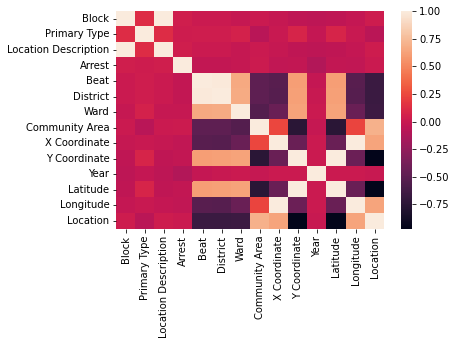

In [56]:
sns.heatmap(corelation)

In [57]:
selected_columns = ['Latitude','Longitude','Location Description','Block']

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(crime_df[selected_columns], crime_df['Primary Type'], test_size=0.3) # 70% training and 30% test

In [59]:
knn_5 = KNeighborsClassifier(n_neighbors=5) 
knn_5.fit(X_train,y_train)
pred_train = knn_5.predict(X_train)
pred_i = knn_5.predict(X_test)
print('Test accuracy ', metrics.accuracy_score(y_train, pred_train))
print('Accuracy ', metrics.accuracy_score(y_test, pred_i))
print('F1 score ', metrics.f1_score(y_test, pred_i, average = 'weighted'))

Test accuracy  0.45745759542595416
Accuracy  0.29721429768208607
F1 score  0.2878999965672365


Here I will try ensemble of Various classification models

In [60]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [61]:
#KNN with - 25 neighbours
knn = KNeighborsClassifier(25, metric='manhattan', weights = 'uniform',n_jobs= -1)

#random forest with 75 Decision Trees
rf = RandomForestClassifier(10, max_depth = 10, n_jobs= -1)

#Support Vector Classifier
svm = SVC(kernel = 'linear', random_state = 123, probability=True)

In [62]:
knn.fit(X_train,y_train)

KNeighborsClassifier(metric='manhattan', n_jobs=-1, n_neighbors=25)

In [63]:
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, n_estimators=10, n_jobs=-1)

In [64]:
rf.score(X_test, y_test)

0.3288653545352421

In [ ]:
svm.fit(X_train,y_train)

In [ ]:
svm.score(X_test, y_test)

In [ ]:
#create a dictionary of our models
estimators=[('knn', knn), ('rf', rf), ('svm', svm)]
#create our voting classifier, inputting our models
ensemble = VotingClassifier(estimators, voting='hard')

In [ ]:
#fit model to training data
ensemble.fit(X_train, y_train)
#test our model on the test data
ensemble.score(X_test, y_test)

Classifying the data

In [ ]:
crimes = crime_df.iloc[:, 2:]
crimes.head()

In [ ]:
crimes.index = pd.to_datetime(crimes.index)
crimes.head(5)

In [ ]:
crime_counts = pd.DataFrame(crime_df.groupby('Primary Type').size().sort_values(ascending=False).rename('counts').reset_index())
crime_counts

In [ ]:
classifiedCrimes = crime_df.replace(['THEFT', 'BURGLARY', 'MOTOR VEHICLE THEFT', 'ROBBERY' ,'BATTERY', 'CRIMINAL SEXUAL ASSAULT', 'CRIM SEXUAL ASSAULT',
                                        'SEX OFFENSE' , 'NARCOTICS','OTHER NARCOTIC VIOLATION' , 'ASSAULT', 'INTIMIDATION' ,
                                        'OTHER OFFENSE' , 'RITUALISM', 'DECEPTIVE PRACTICE' , 'CRIMINAL TRESPASS' , 'WEAPONS VIOLATION' , 
                                        'CONCEALED CARRY LICENSE VIOLATION','PUBLIC INDECENCY', 'PUBLIC PEACE VIOLATION',
                                        'OFFENSE INVOLVING CHILDREN','PROSTITUTION','INTERFERENCE WITH PUBLIC OFFICER','HOMICIDE',
                                        'ARSON', 'CRIMINAL DAMAGE','GAMBLING','LIQUOR LAW VIOLATION','KIDNAPPING','STALKING', 
                                        'OBSCENITY','NON - CRIMINAL','NON-CRIMINAL', 'NON-CRIMINAL (SUBJECT SPECIFIED)','HUMAN TRAFFICKING']
                    ,[1,1,1,1,2,2,2,2,3,3,4,4,5,5,6,7,8,8,9,9,10,11,12,13,14,14,15,16,17,18,18,19,19,19,20])

In [ ]:
primaryTypes = classifiedCrimes[['Primary Type']]
classifiedCrimeCounts = pd.DataFrame(primaryTypes.groupby('Primary Type').size().sort_values(ascending=False).rename('counts').reset_index())
classifiedCrimeCounts

In [ ]:
classifiedCrimes=classifiedCrimes.dropna()

In [ ]:
classifiedCrimes = classifiedCrimes[['Primary Type','Latitude','Longitude','Year']]

In [ ]:
classifiedCrimes.head(10)

In [ ]:
classifiedCrimes1 = classifiedCrimes.dropna(axis=0,how='any')

In [ ]:
classifiedCrimes1.index = pd.to_datetime(classifiedCrimes1.index)

In [ ]:
classifiedCrimes1.head(10)

In [ ]:
classifiedCrimes1 = classifiedCrimes1.reset_index()
#classifiedCrimes1['weekday'] = classifiedCrimes1['Date'].dt.dayofweek
classifiedCrimes1['weekday'] = classifiedCrimes1['Date'].dt.dayofweek
classifiedCrimes1.head(10)

In [ ]:
import math
def train(X,T):
    means = np.mean(X,axis = 0)
    stds = np.std(X, axis = 0)
    Xs = (X - means) / stds
    Xs1 = np.hstack((np.ones((Xs.shape[0],1)),Xs))
    w = np.linalg.lstsq(np.dot(Xs1.T,Xs1), np.dot(Xs1.T, T))[0]
    return {'means':means, 'stds':stds, 'w':w}

In [ ]:
def use(model, X):
    mean = model['means']
    std = model['stds']
    Xs = (X - mean) / std
    Xs1 = np.hstack((np.ones((Xs.shape[0],1)),Xs))
    new_w = model['w']
    predict = np.dot( Xs1,new_w )
    return predict

In [ ]:
def rmse(predict, T):
    error = predict - T
    square = error ** 2
    mean = np.mean(square)
    root = np.sqrt(mean)
    return root

Let's first define the X and T matrices using classifiedCrimes1 dataFrame. Since this is a dataFrame, we first convert it to a numpy array so that we can slice it.

The matrix X should contain the Latitude, Longitude, Year and Weekday. T consists of the Primary Type(Crime)

In [ ]:
CrimesData = classifiedCrimes1[classifiedCrimes1.columns[1:]].to_numpy()

In [ ]:
X = np.float64(CrimesData[:,2:6])
X

In [ ]:
T = np.float64(CrimesData[:,1:2])
T

In [ ]:
model = train(X, T)
predict = use(model, X)
error = rmse(predict, T)

In [ ]:
error

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, T, test_size=0.3) # 70% training and 30% test

In [ ]:
from sklearn import preprocessing
from sklearn import utils
print(utils.multiclass.type_of_target(X_test))

In [ ]:
lab_enc = preprocessing.LabelEncoder()
y_train_e = lab_enc.fit_transform(y_train)

In [ ]:
def partitionKFolds(X,T,nFolds,shuffle=False,nPartitions=3):
    # Randomly arrange row indices
    rowIndices = np.arange(X.shape[0])
    if shuffle:
        np.random.shuffle(rowIndices)
    # Calculate number of samples in each of the nFolds folds
    nSamples = X.shape[0]
    nEach = int(nSamples / nFolds)
    if nEach == 0:
        raise ValueError("partitionKFolds: Number of samples in each fold is 0.")
    # Calculate the starting and stopping row index for each fold.
    # Store in startsStops as list of (start,stop) pairs
    starts = np.arange(0,nEach*nFolds,nEach)
    stops = starts + nEach
    stops[-1] = nSamples
    startsStops = list(zip(starts,stops))
    # Repeat with testFold taking each single fold, one at a time
    for testFold in range(nFolds):
        if nPartitions == 3:
            # Repeat with validateFold taking each single fold, except for the testFold
            for validateFold in range(nFolds):
                if testFold == validateFold:
                    continue
                # trainFolds are all remaining folds, after selecting test and validate folds
                trainFolds = np.setdiff1d(range(nFolds), [testFold,validateFold])
                # Construct Xtrain and Ttrain by collecting rows for all trainFolds
                rows = []
                for tf in trainFolds:
                    a,b = startsStops[tf]                
                    rows += rowIndices[a:b].tolist()
                Xtrain = X[rows,:]
                Ttrain = T[rows,:]
                # Construct Xvalidate and Tvalidate
                a,b = startsStops[validateFold]
                rows = rowIndices[a:b]
                Xvalidate = X[rows,:]
                Tvalidate = T[rows,:]
                # Construct Xtest and Ttest
                a,b = startsStops[testFold]
                rows = rowIndices[a:b]
                Xtest = X[rows,:]
                Ttest = T[rows,:]
                # Return partition matrices, then suspend until called again.
                yield Xtrain,Ttrain,Xvalidate,Tvalidate,Xtest,Ttest,testFold
        else:
            # trainFolds are all remaining folds, after selecting test and validate folds
            trainFolds = np.setdiff1d(range(nFolds), [testFold])
            # Construct Xtrain and Ttrain by collecting rows for all trainFolds
            rows = []
            for tf in trainFolds:
                a,b = startsStops[tf]                
                rows += rowIndices[a:b].tolist()
            Xtrain = X[rows,:]
            Ttrain = T[rows,:]
            # Construct Xtest and Ttest
            a,b = startsStops[testFold]
            rows = rowIndices[a:b]
            Xtest = X[rows,:]
            Ttest = T[rows,:]
            # Return partition matrices, then suspend until called again.
            yield Xtrain,Ttrain,Xtest,Ttest,testFold

In [ ]:
def train(X,T,lamb):
    means = np.mean(X,axis = 0)
    stds = np.std(X, axis = 0)
    Xs = (X - means) / stds
    Xs1 = np.hstack((np.ones((Xs.shape[0],1)),Xs))
    w = np.linalg.lstsq(np.dot(Xs1.T,Xs1), np.dot(Xs1.T, T))[0]
    means = X.mean(0)
    stds = X.std(0)
    n,d = X.shape
    Xs1 = np.insert( (X - means)/stds, 0, 1, axis=1)
    lambDiag = np.eye(d+1) * lamb
    lambDiag[0,0] = 0
    w = np.linalg.lstsq( np.dot(Xs1.T,Xs1) + lambDiag, np.dot(Xs1.T,T))[0]
    return {'w': w, 'means':means, 'stds':stds}

def use(X,model):
    Xs1 = np.insert((X-model['means'])/model['stds'], 0, 1, axis=1)
    return np.dot(Xs1,model['w'])

def rmse(A,B):
    return np.sqrt(np.mean( (A-B)**2 ))

In [ ]:
def multipleLambdas(X, T, nFolds, lambdas):
    foldCount = 0
    results = []
    for Xtrain,Ttrain,Xval,Tval,Xtest,Ttest,_ in partitionKFolds(X,T,nFolds,True):
        for lamb in lambdas:
            model = train(Xtrain,Ttrain,lamb)
            predict = use(Xval,model)
            results.append([foldCount,lamb,rmse(use(Xtrain,model),Ttrain),rmse(use(Xval,model),Tval),rmse(use(Xtest,model),Ttest)])
        foldCount +=1
    results = np.array(results)
    bestresults = []  
    for i in range(foldCount):
        FCRow = np.take(results,(np.where(results[:,0:1] == i))[0], axis =0)
        minRow = np.where(results[:,3:4] == (np.amin(FCRow[:,3:4],axis=0)))[0]
        bestresults.append(np.take(results,minRow,axis=0))
    bestresults = np.array(bestresults)
    bestresults = bestresults.reshape(bestresults.shape[0], bestresults.shape[2])
    return bestresults

In [ ]:
lambdas = [0,1,2,3,4,5]
bestresults = multipleLambdas(X,T,4,lambdas)
bestresults

In [ ]:
pip install neuralnetwork

In [ ]:

from neuralnetwork import 

In [ ]:
def trainNN(X,T, parameters):
    nnet = nn(X.shape[1], parameters[0], T.shape[1])
    nnet.train(X,T, nIterations=parameters[1], verbose=False)
    return {'net': nnet}

**Building initial KNN Classifier**




Initially we will build our classifier with 5 neighbours

In [ ]:
knn_5 = KNeighborsClassifier(n_neighbors=15, metric='manhattan', weights ='uniform')
knn_5.fit(X_train,y_train_e)
pred_train = knn_5.predict(X_train)
pred_i = knn_5.predict(X_test)
#print('Test accuracy ', metrics.accuracy_score(y_train, pred_train))
print('Accuracy ', metrics.accuracy_score(y_test, pred_i))
print('F1 score ', metrics.f1_score(y_test, pred_i, average = 'weighted'))

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

In [ ]:
regressor = DecisionTreeRegressor(random_state=0)

In [ ]:
cross_val_score(regressor, X_train, y_train, cv=10)

In [ ]:
from sklearn.linear_model import LogisticRegression  
classifier= LogisticRegression(random_state=0)  
classifier.fit(X_train, y_train) 

In [ ]:
y_pred= classifier.predict(X_test)  

In [ ]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))

In [ ]:
print(metrics.confusion_matrix(y_test, y_pred))

In [ ]:
crime_df.head()

In [ ]:
crime_df = crime_df.dropna()
crime_df.isnull().sum().sum()
keep_cols = ['Arrest','Primary Type','Domestic','District','Location Description','X Coordinate','Y Coordinate']
crime_df = crime_df[keep_cols].reset_index()
crime_df.head()

In [ ]:
percentage_intances = crime_df.groupby('Arrest').size() * 100 / len(crime_df)
print(percentage_intances)
print("------------------")
print("Percentage Positive Instance = {}\nPercentage Negative Instance = {} ".format(percentage_intances[1],percentage_intances[0]))

In [ ]:
len(crime_df['Location Description'].unique().tolist())

In [ ]:
X=crime_df.drop('Arrest',axis=1)
features = list(X.columns)
y = crime_df["Arrest"]

In [ ]:
X.head()

In [ ]:
labelencoder = LabelEncoder()
X['Primary Type']=X['Primary Type'].astype("category").cat.codes
X['Location Description']=X['Location Description'].astype("category").cat.codes

In [ ]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
X[['X Coordinate', 'Y Coordinate']] = scaler.fit_transform(X[['X Coordinate', 'Y Coordinate']])

In [ ]:
#X.head()

In [ ]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X,y)
predicted = dt_clf.predict(X[features])
recall_score = metrics.recall_score(crime_df['Arrest'], predicted)
precision_score = metrics.precision_score(crime_df['Arrest'], predicted)
accuracy_score = metrics.accuracy_score(crime_df['Arrest'], predicted)
print("Training Accuracy = {} Precision = {} Recall = {}".format(accuracy_score,precision_score,recall_score))

In [ ]:
for depth in range(1,10):
    tree_clf = DecisionTreeClassifier(max_depth=depth, random_state=0)
    if tree_clf.fit(X,y).tree_.max_depth < depth:
        break
    score = np.mean(cross_val_score(tree_clf, X, y,scoring='accuracy', cv=10, n_jobs=1))
    print("Depth: %i Accuracy: %.3f" % (depth,score))

In [ ]:
dt_clf = DecisionTreeClassifier(max_depth=3)
dt_clf.fit(X,y)
predicted = dt_clf.predict(X[features])
dt_recall = metrics.recall_score(crime_df['Arrest'], predicted)
dt_precision = metrics.precision_score(crime_df['Arrest'], predicted)
dt_accuracy= metrics.accuracy_score(crime_df['Arrest'], predicted)
dt_f1score = metrics.f1_score(crime_df['Arrest'], predicted)
print("Accuracy for DT =",dt_accuracy)
print("Precision for DT =",dt_precision)
print("Recall for DT =",dt_precision)
print("F1 Score for DT=", dt_f1score)

In [ ]:
importances=dt_clf.feature_importances_
indices = np.argsort(importances)[::-1]
# Print the feature ranking
print("Feature ranking:")
# We have taken the top 5 feature 
print("The main features used for classification")
print(X.columns[indices[:5]])
print("Top main feature is",X.columns[indices[:1]][0])

In [ ]:
# Applying 10 fold cross validation
dt_cv_accuracy = cross_val_score(dt_clf, X, y, cv=10).mean()
dt_cv_precision= cross_val_score(dt_clf, X, y, cv=10, scoring='precision').mean()
dt_cv_recall = cross_val_score(dt_clf, X, y, cv=10, scoring='recall').mean()
print("Cross Validation Accuracy DT:", dt_cv_accuracy)
print("Cross Validation Recall DT:", dt_cv_precision)
print("Cross Validation Precision DT:", dt_cv_recall)

In [ ]:
crimes.date = pd.to_datetime(crimes.date)

In [ ]:
# Creating a Countplot to view yearwise criminal activity
crime_df = crime_df[crime_df['Year'] > 2010]
yearwise_total_crime = crime_df.groupby('Year').size()
print(yearwise_total_crime)

In [ ]:
crime_date = crime_df.groupby('Date').size()
print(crime_date)

In [ ]:
crime_date.index

In [ ]:
from datetime import datetime
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA

**Plotting the rolling mean and standard deviation**

In [ ]:
def  check_stationarity_graph(timeseries):
    
    # Determine rolling statistics (moving averages and variance)
    rolmean = pd.Series(timeseries).rolling(window=12).mean()
    rolstd = pd.Series(timeseries).rolling(window=12).std()

    

    fig,ax = plt.subplots()
    ax.plot(timeseries,color='blue', label='Original')
    ax.plot(rolmean, color='red', label='Rolling Mean')
    ax.plot(rolstd,color='black', label = 'Rolling Std')
    ax.set_title('Rolling Mean & Standard Deviation')
    display(fig)

    
    # Perform Dickey-Fuller test:
def  check_stationarity_data(timeseries):
    print('Results of Dickey-Fuller Test:')
    y = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(y[0:4], 
                index = ['Test Statistic','p-value','Number of Observations Used'])
    for key,value in y[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

In [ ]:
check_stationarity_graph(crime_date)

In [ ]:
#check_stationarity_data(crime_date)

**Visualizing crime time series data**

In [ ]:
fig,ax = plt.subplots()
ax.plot(crime_date)
display(fig)

**Plotting data by using log value of crimes**

In [ ]:
ts_log = np.log(crime_date)
fig,ax = plt.subplots()
ax.plot(ts_log)
display(fig)

**Plotting moving average**

In [ ]:
#moving_avg = pd.rolling_mean(ts_log,12)
moving_avg = ts_log.rolling(12).mean()
fig,ax = plt.subplots()
ax.plot(moving_avg, color='blue')
ax.plot(ts_log, color='orange')
display(fig)

In [ ]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(12)

In [ ]:
ts_log_moving_avg_diff.dropna(inplace=True)
check_stationarity_graph(ts_log_moving_avg_diff)

In [ ]:
expwighted_avg = pd.ewma(ts_log, halflife=17)
fig,ax = plt.subplots()
ax.plot(ts_log, color='orange')
ax.plot(expwighted_avg,color='blue')
display(fig)

In [ ]:
lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

# Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

# Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()
display()